In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Gradient Descent (Advanced)

In this exercice, we will

- code our own gradient descent in vectorized form for a high-dimension loss function
- Investigate early stopping criteria to avoid overfitting

## Our dataset

In [14]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True,as_frame=True) # Computations are way faster
#X,y = X.sample(n=300),y.sample(n=300)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


### Select only BMI as a feature to predict y with sklearn linreg

In [15]:
#X = X[['age','sex','bmi','bp','s5']]
#X = X[['sex','bmi','bp','s5']]
#X = X[['sex','bmi','bp','s5']]
X = np.array(X['bmi']).reshape(-1,1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=2)

In [17]:
linreg = LinearRegression().fit(X_train,y_train)

In [18]:
y_pred = linreg.predict(X_test)

In [19]:
r2_score(y_test, y_pred)

0.39574965948156515

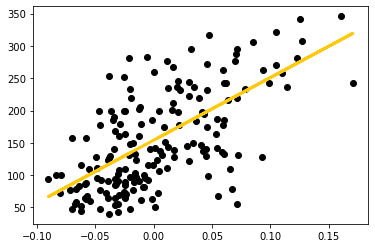

In [20]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='#FFC90E', linewidth=3)

### add polynomial features

In [22]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)
X_poly = interaction.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.40, random_state=2)

In [24]:
X_train.shape

(265, 6)

In [25]:
linreg = LinearRegression().fit(X_train,y_train)

In [26]:
y_pred = linreg.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.36602236842469027

In [28]:
lower_x = min(X_test[:,0])
upper_x =  max(X_test[:,0])

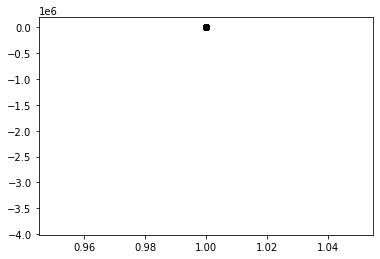

In [29]:
plt.scatter(X_test[:,0], y_test,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)
x = np.linspace(lower_x, upper_x, 1000).reshape(-1, 1)
x_poly = interaction.fit_transform(x)
plt.plot(x, linreg.predict(x_poly), '-', markersize=10, color='#FFC90E', zorder=0)

### Add constant column for manual gradient descent

❓ Standardize all your features, and (only) then add an "constant" $X_0$ to your dataset so that your OLS will be centered around the mean

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_poly)

In [ ]:
ones = np.ones((len(y),1))

In [ ]:
X_new = np.hstack((X_std,ones))

In [ ]:
X_new.shape

❓Create a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.40, random_state=2)

## Code your vectorial gradient descent

We're modelling a linear regression $\hat{y} = X\beta$

Let's recall the definition of the gradient descent algorithm

$$\text{Gradient descent - vector formula}$$
$$\beta^{\color {red}{(k+1)}} = \beta^{\color {red}{(k)}} - \eta \ \nabla L(\beta^{\color{red}{(k)}})$$

The MSE Loss for an OLS regression is

$$L(\beta) = \frac{1}{n}\|X \beta - y\|^2 = \frac{1}{n}(X \beta - y)^T(X \beta - y)$$

and its gradient is
$${\displaystyle \nabla L(\beta)=
{\begin{bmatrix}{\frac {\partial L}{\partial \beta_{0}}}(\beta)\\\vdots \\{\frac {\partial L}{\partial \beta_{p}}}(\beta)\end{bmatrix}} = \frac{2}{n} X^T (X\beta - y) 
}$$

Let's store below our main problem parameters

In [ ]:
eta = 0.01 # learning rate
n_epochs = 1500 # number of epochs in our gradient descent
n = X_new.shape[0] # n observations
n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X_new.shape[1] # p features

___
❓ Initialize a $\beta$ vector as an ndarray of the right shape for our problem with the values of your choice (zeros, for instance)

In [ ]:
beta = np.zeros(p)
beta.shape

❓ Using the vectorized formula given above, create a gradient descent that loops over `n_epochs` to find the best $\beta$ of an OLS using the `train` set
- make use of numpy's matrix operations and broadcasting capabilities (convert your X to numpy's
- this shouldn't take more than 4 lines of code!
- use `%%time` to keep track of computation time, and and [`tqdm`](https://pypi.org/project/tqdm/) to display the progress bar

In [ ]:
# convert X,y to numpy ND array, it's much faster than pandas to make matrix products
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
%%time
from tqdm import tqdm

for epoch in tqdm(range(n_epochs)):
    gradients = X_train.T.dot(X_train.dot(beta) - y_train)  /n_train 
    beta = beta - eta * gradients

In [ ]:
beta

## Compare results with sklearn models

❓Compute your `mse_test` metrics, and compare your results (mse and computation time) with
- a Sklearn LinearRegression()
- SGDRegressor, with similar epochs and learning_rate, adding 'penalty'= None to remove regularization that we will see in ML-05-Model-Tuning)
- (optional) cross_validate all your metrics to be sure of your scores

Are you better? Faster? 

In [ ]:
## TODO CROSS VALIDATE ALL THESE METRICS

In [ ]:
y_pred = X_test.dot(beta)
print(mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))

In [ ]:
#import statsmodels.api as sm
#est = sm.OLS(y, X)
#est2 = est.fit()
#print(est2.summary())

In [ ]:
eta = 0.01 # learning rate
n_epochs = 50000 # number of epochs in our gradient descent
n = X_new.shape[0] # n observations
n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X_new.shape[1] # p features

❓ Wrap this logic into a function `gradient_descent`, which takes any (X_train, y_train, X_test, y_test, eta, n_epoch) as input, and returns 
- the final value for $\beta$ fitted on the train set
- the values of the `loss_train` at each epoch as a list `loss_train_history`
- the values of the `loss_test` at each epoch as a list `loss_test_history`
- (optional) make the fonction robust to call with only a train_set

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, eta=eta, n_epochs=n_epochs):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    
    loss_train_history = []
    loss_test_history = []
    
    beta = np.zeros(p)
    
    for epoch in range(n_epochs):
        # update beta
        gradient = 2/n_train * X_train.T.dot(X_train.dot(beta) - y_train)
        beta = beta - eta * gradient
        
        # compute loss
        y_pred_train = X_train.dot(beta)
        y_pred_test = X_test.dot(beta)
        loss_train = 1/n_train*(y_train - y_pred_train).T.dot(y_train - y_pred_train)
        loss_test = 1/n_test*(y_test - y_pred_test).T.dot(y_test - y_pred_test)
        
        loss_test_history.append(loss_test)
        loss_train_history.append(loss_train)
        
    return beta, loss_train_history, loss_test_history

## Early stopping criteria?

❓Plot the loss as a function of epochs, on your train dataset. 
- Try it with `n_epochs=50000` and `eta=0.1` as per initially set
- What can you conclude? Should you always descent gradient down to the absolute minimum?

In [ ]:
beta, loss_train_history, loss_test_history =\
gradient_descent(X_train, y_train, X_test, y_test, n_epochs=10000, eta=eta)

In [ ]:
plt.plot(loss_train_history, label='loss_train')
plt.plot(loss_test_history, label='loss_test')
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.legend()

❓ Try to improve your own model MSE by coding an **early stopping criteria** where you would stop descending gradient as soon as `loss_test` increases again

In [ ]:
# TODO

❓ Did you notice...you have just done a data-leak! Can you guess why? Think about a solution to this problem!

<details>
    <summary>Hint</summary>

- You have used your test set to decide when to stop descending gradient
- You should never use your test set to optimize your model `hyperparameters`
- Create a train/test split **within** your current training set and optmize your early stopping based on the loss on this new test set only. This one is called a "validation set"
</details>

## Code your own MiniBatch Gradient Descent

❓Modify your `gradient_descent` function into a `minibatch_gradient_descent` one.

## (Optional) finetuning

Try to narrow performance gap between your self-made model and SKLearn by
- changing initial learning_rate `eta`
- gradually reduce learning_rate in your `minibatch_gradient_descent` function
- optimize your minibatch code so as to paralellize it better

### ⚠️ Please, push your exercice when you are done 🙃

# 🏁

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
r2_score(diabetes_y_test, diabetes_y_pred)

In [ ]:
len(diabetes_X_test)